In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [164]:
heart_data.shape

(303, 16)

In [64]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_chol_interaction
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,senior,14679
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,middle-aged,9250
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-aged,8364
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,elderly,13216
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,elderly,20178


In [66]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_chol_interaction
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,elderly,13737
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,middle-aged,11880
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,senior,13124
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,elderly,7467
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,elderly,13452


In [68]:
if heart_data.isnull().sum().any():
    print("Missing values detected.")
else:
    print("No missing values detected.\n")

heart_data.isnull().sum()

No missing values detected.



age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      0
thal                    0
target                  0
age_group               0
age_chol_interaction    0
dtype: int64

In [74]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   303 non-null    int64   
 1   sex                   303 non-null    int64   
 2   cp                    303 non-null    int64   
 3   trestbps              303 non-null    int64   
 4   chol                  303 non-null    int64   
 5   fbs                   303 non-null    int64   
 6   restecg               303 non-null    int64   
 7   thalach               303 non-null    int64   
 8   exang                 303 non-null    int64   
 9   oldpeak               303 non-null    float64 
 10  slope                 303 non-null    int64   
 11  ca                    303 non-null    int64   
 12  thal                  303 non-null    int64   
 13  target                303 non-null    int64   
 14  age_group             303 non-null    category
 15  age_ch

In [76]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_chol_interaction
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,13488.726073
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,4037.198053
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5916.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,10658.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,13050.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,15796.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,37788.000000


In [78]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [40]:
heart_data['age_group'] = pd.cut(heart_data['age'], bins=[0, 30, 45, 60, np.inf], labels=['young', 'middle-aged', 'elderly', 'senior'])
heart_data['age_chol_interaction'] = heart_data['age'] * heart_data['chol']

In [42]:
X = heart_data.drop(columns=['target', 'age'], axis=1) 
Y = heart_data['target']

In [48]:
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [54]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [60]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [82]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [84]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, Y_train)
best_model = grid_search.best_estimator_

In [88]:
train_predictions = best_model.predict(X_train_pca)
train_accuracy = accuracy_score(Y_train, train_predictions)
print("Training data accuracy:", train_accuracy)

Training data accuracy: 0.8388429752066116


In [90]:
test_predictions = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(Y_test, test_predictions)
print("Test data accuracy:", test_accuracy)

Test data accuracy: 0.819672131147541


In [92]:
print("Classification Report:")
print(classification_report(Y_test, test_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [94]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions))

Confusion Matrix:
[[21  7]
 [ 4 29]]


In [170]:
roc_auc = roc_auc_score(Y_test, best_model.predict_proba(X_test_pca)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9069264069264069


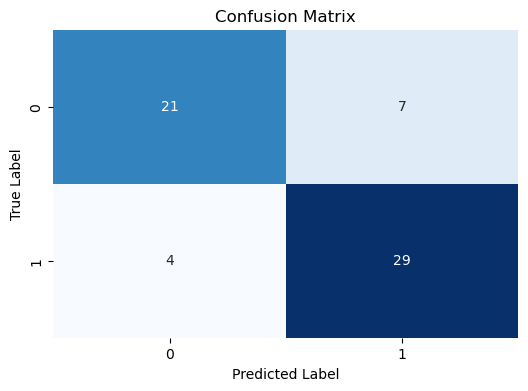

In [186]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, test_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [178]:
def predict_heart_disease(input_data, model, preprocessor, pca):
    try:
        input_data_dict = {
            'age': [input_data[0]],
            'sex': [input_data[1]],
            'cp': [input_data[2]],
            'trestbps': [input_data[3]],
            'chol': [input_data[4]],
            'fbs': [input_data[5]],
            'restecg': [input_data[6]],
            'thalach': [input_data[7]],
            'exang': [input_data[8]],
            'oldpeak': [input_data[9]],
            'slope': [input_data[10]],
            'ca': [input_data[11]],
            'thal': [input_data[12]],
            'age_group': [input_data[13]],
            'age_chol_interaction': [input_data[14]]
        }
        input_data_df = pd.DataFrame(input_data_dict)
        input_data_transformed = preprocessor.transform(input_data_df)
        input_data_pca = pca.transform(input_data_transformed)
        prediction = model.predict(input_data_pca)
        if prediction[0] == 0:
            return 'The Person does not have a Heart Disease'
        else:
            return 'The Person has Heart Disease'
    except Exception as e:
        return f"An error occurred: {e}"

In [196]:
input_data = [41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 'middle-aged', 8416]


In [198]:
prediction_result = predict_heart_disease(input_data, best_model, preprocessor, pca)
print("Prediction Result:", prediction_result)

Prediction Result: The Person has Heart Disease
